In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data=sns.load_dataset("titanic")

In [35]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
data.pclass.unique()

array([3, 1, 2], dtype=int64)

In [37]:
data.pclass=data.pclass.apply(lambda x: 'A' if x==1 else 'B' if x==2 else 'C' if x==3 else x)

In [38]:
data.pclass.unique()

array(['C', 'A', 'B'], dtype=object)

In [39]:
data.pclass.value_counts()

C    491
A    216
B    184
Name: pclass, dtype: int64

# 1. Working with Qualitative/Categorical data
- a. Frequency Distribution Table
- Frequency tells you how often something happened. The frequency of an observation tells you the number of times the observation occurs in the data. For example, in the following list of numbers, the frequency of the number 9 is 5 (because it occurs 5 times):

- 1, 2, 3, 4, 6, 9, 9, 8, 5, 1, 1, 9, 9, 0, 6, 9.

In [40]:
pclass_table=data.pclass.value_counts()
pclass_table

C    491
A    216
B    184
Name: pclass, dtype: int64

In [41]:
x = pclass_table.index
y = pclass_table.values

In [42]:
x

Index(['C', 'A', 'B'], dtype='object')

In [43]:
y

array([491, 216, 184], dtype=int64)

# Bar chart

<Axes: >

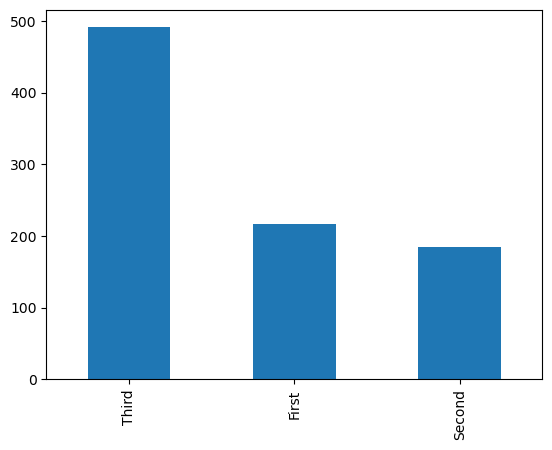

In [44]:
data['class'].value_counts().plot(kind='bar')

<BarContainer object of 3 artists>

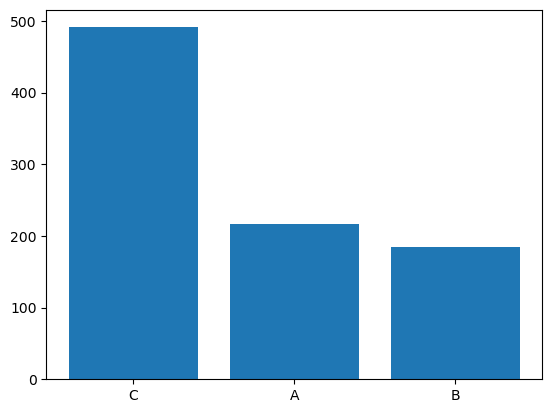

In [45]:
plt.bar(x,y)

<Axes: xlabel='pclass'>

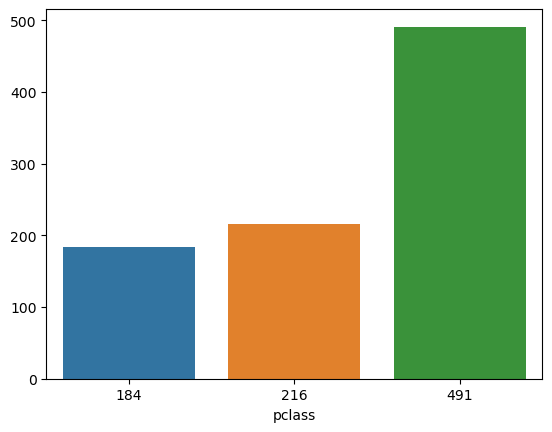

In [46]:
sns.barplot(x=pclass_table.index, y=pclass_table.values,data=pclass_table)

# pie chart

<Axes: ylabel='pclass'>

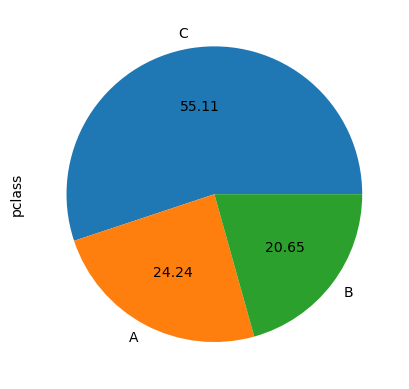

In [47]:
data['pclass'].value_counts().plot(kind='pie',autopct='%0.2f')

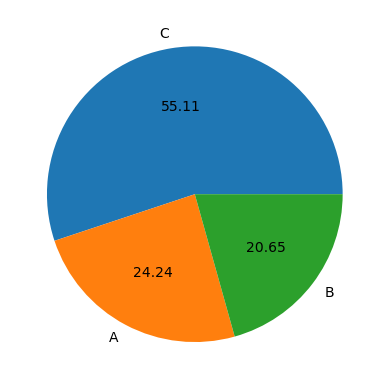

In [48]:
plt.pie(y, labels=x,autopct="%0.2f")
plt.show()

# d. Cumulative Frequency
The frequency is the number of times an event occurs within a given scenario. Cumulative frequency is defined as the running total of frequencies. It is the sum of all the previous frequencies up to the current point. It is easily understandable through a Cumulative Frequency Table.



In [49]:
a=data['pclass'].value_counts()
a

C    491
A    216
B    184
Name: pclass, dtype: int64

In [50]:
b=((a/a.sum())*100).values
b

array([55.10662177, 24.24242424, 20.65095398])

In [51]:
c=[]
cf=0
for i in b:
    cf=cf+i
    c.append(cf)
    c

In [52]:
c

[55.106621773288445, 79.34904601571269, 100.0]

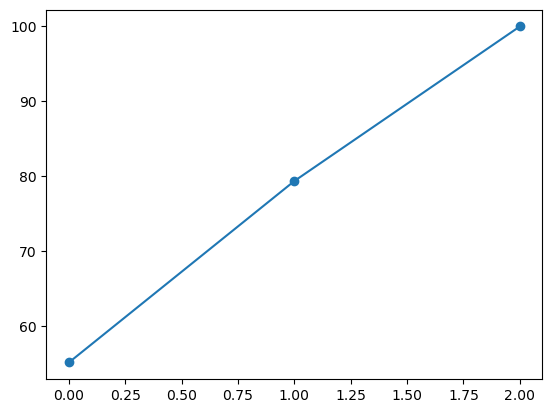

In [53]:
plt.plot(c,marker='o')

# 2. Working with Quantitative/Numerical data
# a. Histograms

In [54]:
d=data['age'].values
d[3]

35.0

(array([102., 220., 167.,  89.,  48.,  21.]),
 array([10., 20., 30., 40., 50., 60., 70.]),
 <BarContainer object of 6 artists>)

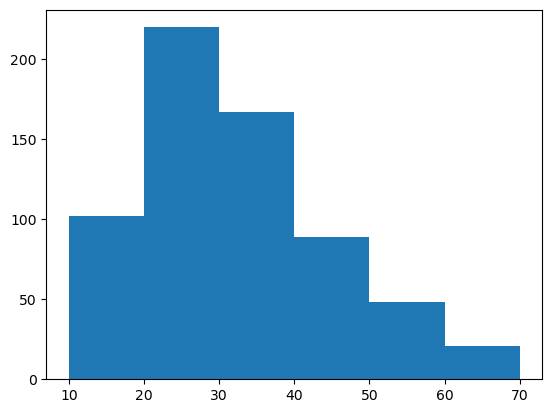

In [55]:
plt.hist(data['age'].values,bins=[10,20,30,40,50,60,70])

# b. Boxplots

<Axes: >

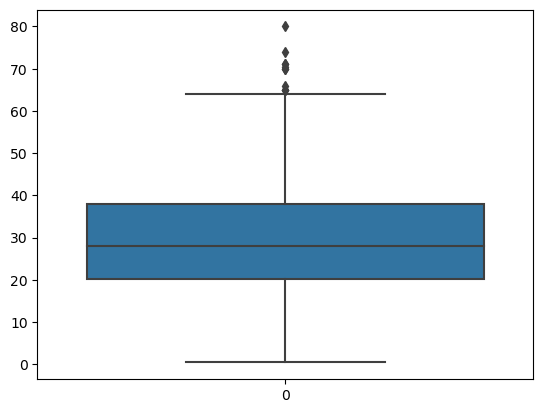

In [56]:
sns.boxplot(data['age'])

In [57]:
a=data.dropna(subset=['age'])
a=a['age'].values
np.median(a)

28.0

# c. Kdeplot

<Axes: xlabel='age', ylabel='Density'>

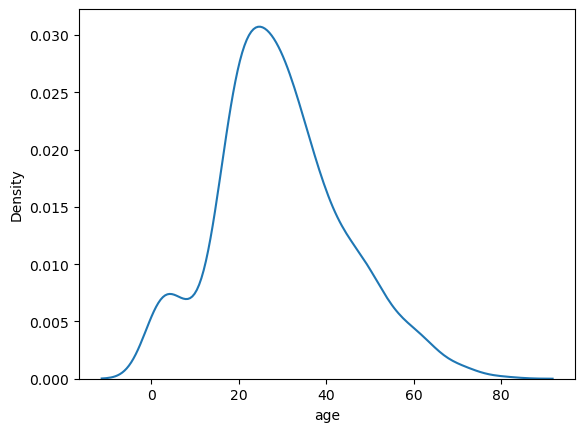

In [58]:
sns.kdeplot(data['age'])

# Working with 2 variables/data (Bivariate Analysis)
# 1. Categorical Vs Numerical
# a. Box Plot

<Axes: xlabel='pclass', ylabel='age'>

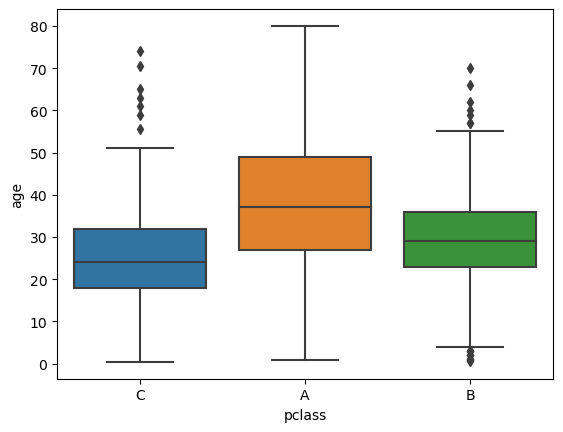

In [59]:
sns.boxplot(x='pclass',y='age',data=data)

<Axes: xlabel='sex', ylabel='age'>

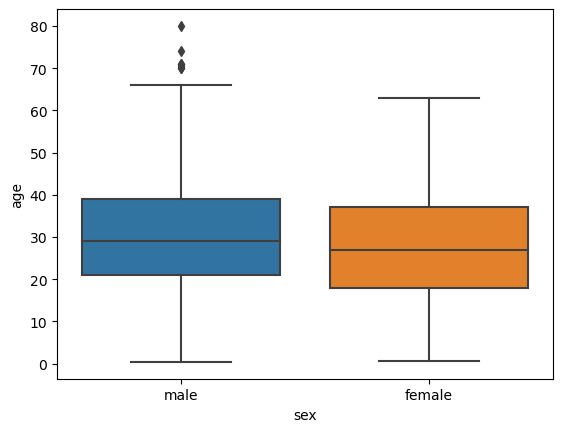

In [60]:
sns.boxplot(x='sex',y='age',data=data)

# b. Bar Plot¶

<Axes: xlabel='pclass', ylabel='age'>

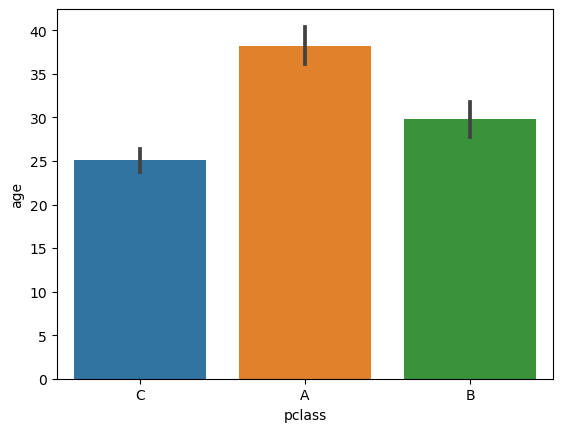

In [61]:
sns.barplot(x='pclass',y='age',data=data)

# 2. Numerical Vs Numerical
# a. Scatter Plot

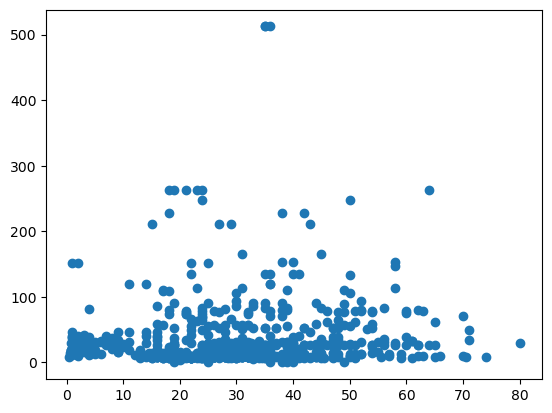

In [62]:
x=data['age'].values
y=data['fare'].values
plt.scatter(x,y)

3. Categorical Vs Categorical
a. Cross Tables/Contingency Table
In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables.



## a. Cross Tables/Contingency Table

<p>In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables.</p>

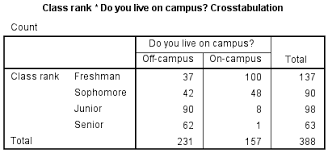

In [63]:
ct=pd.crosstab(data['pclass'],data['sex'])

In [64]:
ct

sex,female,male
pclass,,
A,94,122
B,76,108
C,144,347


# b. Side by side bar chart

<Axes: xlabel='pclass'>

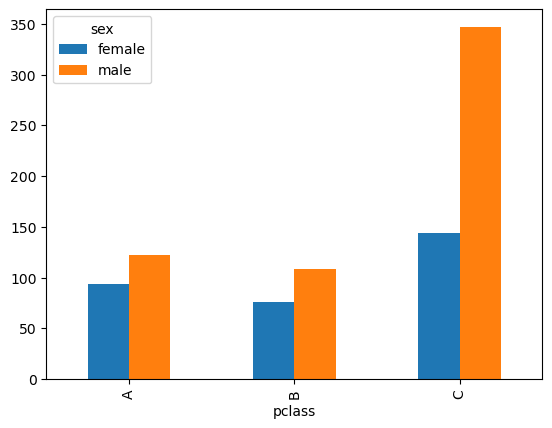

In [65]:
ct.plot(kind='bar')

# c. Heatmaps

<Axes: xlabel='sex', ylabel='pclass'>

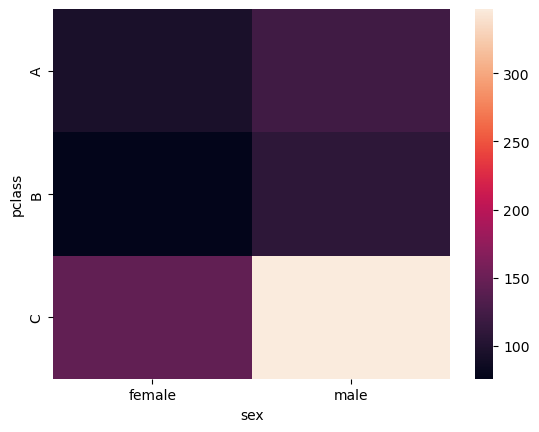

In [66]:
sns.heatmap(ct)